In [1]:
import cv2
import numpy as np
import os

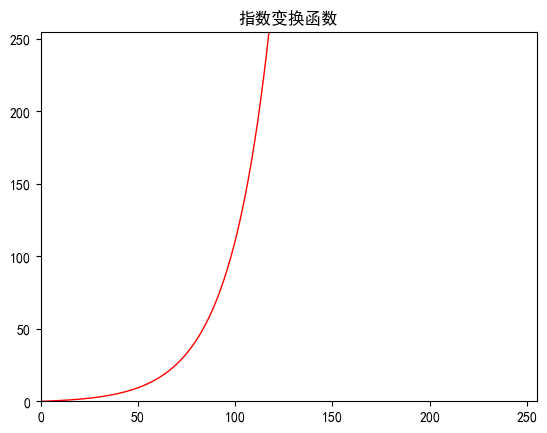

-1

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

image_0 = cv2.imread("ch_images\\ch1\\iso\\061902_r02c03f01p17-ch1sk1fk1fl1.tiff", cv2.IMREAD_UNCHANGED)



def indexGray(img, c, b, a, showPlt):
    newImg = np.array(b ** (c * (img - a)) - 1,dtype=np.uint8)
    if showPlt:
        x = np.arange(0, 256, 0.01)
        y = b ** (c * (x - a)) - 1
        plt.plot(x, y, 'r', linewidth=1)
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.title(u'指数变换函数')
        plt.xlim(0, 255), plt.ylim(0, 255)
        plt.show()
    return newImg

def gammaGray(img, c, r, showPlt):
    newImg = c * img ** r
    lut = np.zeros(256, dtype=np.float32)
    for i in range(256):
        lut[i] = c * i ** r
    output_img = cv2.LUT(img, lut)
    output_img = np.uint8(output_img + 0.5)
    if showPlt:
        x = np.arange(0, 256, 0.01)
        y = c * x ** r
        plt.plot(x, y, 'r', linewidth=1)
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.title(u'gamma变换函数')
        plt.xlim(0, 255), plt.ylim(0, 255)
        plt.show()
    return output_img

def histogramEqualization(img, RGB=True):
    newImg = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    N = img.shape[0] * img.shape[1]
    BGR = np.zeros((3, 256), dtype=np.float)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            BGR[0][img[i][j][0]] += 1
            BGR[1][img[i][j][1]] += 1
            BGR[2][img[i][j][2]] += 1
    Pr = BGR / N
    Ps = np.zeros((3, 256), dtype=np.float)
    for i in range(0, 256):
        if i == 0:
            Ps[:, i] = Pr[:, i]
        else:
            Ps[:, i] += Ps[:, i - 1] + Pr[:, i]
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            b, g, r = img[i, j, :]
            newImg[i][j] = [round(Ps[0][b] * 255), round(Ps[1][g] * 255), round(Ps[2][r] * 255)]
 
    otherImg = cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    return newImg, otherImg

newimg = indexGray(image_0,0.5,1.1,1,True)
cv2.imshow("img", newimg)
cv2.waitKey(0)

In [42]:
np.max(image_0)

5589

IndexError: index 5589 is out of bounds for axis 0 with size 5589

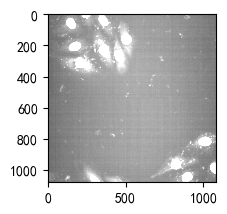

In [24]:

plt.subplot(221)
#后面的参数是为了显示灰度图像，官网有介绍
plt.imshow(image_0,vmin=0,vmax=255,cmap='gray')
 
img_np = np.array(image_0)  #转化为矩阵
width,height = img_np.shape #获取宽与高
N = np.zeros(shape=(1,np.max(img_np)),dtype='float')   #构造零矩阵，用以统计像素数
 
#遍历各个灰度值统计个数
for i in range(0,width):
    for j in range(0,height):
        k = img_np[i,j]
        N[0][k] = N[0][k] + 1
 
N = N.flatten() #扁平化
 
plt.subplot(222)
plt.bar([i for i in range(0,256)],height=N,width=1)
 
#线性变化
plt.subplot(223)
J = img_np.astype('float')
J = 0 + (J-42) * (255-0)/(232-42)   #利用公式转换
#像素值小于0或大于255的分别赋值为0和255
for i in range(0,width):
    for j in range(0,height):
        if J[i,j] < 0 :
            J[i,j] = 0
        elif J[i,j] > 255:
            J[i,j] = 255
image_1 = J.astype('uint8')
plt.imshow(image_1,vmin=0,vmax=255,cmap='gray')
 
plt.subplot(224)
J = J.flatten()
plt.hist(J,bins=255)
 
 
 
plt.show()

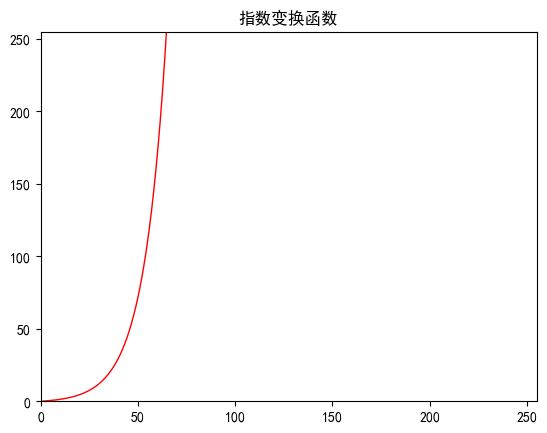

-1

In [41]:
img_np = np.array(image_0)

J = img_np.astype('float')
J = 0 + (J-np.min(img_np)) * (255-0)/(np.max(img_np)-np.min(img_np))

# for i in range(0,width):
#     for j in range(0,height):
#         if J[i,j] < 0 :
#             J[i,j] = 0
#         elif J[i,j] > 255:
#             J[i,j] = 255
image_1 = J.astype('uint8')


def indexGray(img, c, b, a, showPlt):
    newImg = np.array(b ** (c * (img - a)) - 1,dtype=np.uint8)
    if showPlt:
        x = np.arange(0, 256, 0.01)
        y = b ** (c * (x - a)) - 1
        plt.plot(x, y, 'r', linewidth=1)
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.title(u'指数变换函数')
        plt.xlim(0, 255), plt.ylim(0, 255)
        plt.show()
    return newImg

image_2 = indexGray(image_1, 0.9, 1.1, 0, True)

cv2.imshow("img", image_1)
cv2.waitKey(0)

In [17]:
filenames_ch1 = os.listdir(f"ch_images\\ch1\\angii")
fn = filenames_ch1[0]
img = cv2.imread(f"ch_images\\ch1\\angii\\{fn}", cv2.IMREAD_UNCHANGED)

gradX = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)

gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

blurred = cv2.blur(gradient,(8, 8))
(_, thresh) = cv2.threshold(blurred, 247, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

closed = cv2.erode(closed, None, iterations=4)
closed = cv2.dilate(closed, None, iterations=4)

(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cs = sorted(cnts, key=cv2.contourArea, reverse=True)

cv2.imshow("img", closed)
cv2.waitKey(0)

-1

In [18]:
cv2.imwrite("closed2.png", closed)

True

In [6]:
enhance = cv2.equalizeHist(img)
cv2.imshow("img", enhance)
cv2.waitKey(0)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


In [95]:
len(cs)

10

In [96]:
[cv2.contourArea(i) for i in cs]

[3629.5,
 3563.5,
 3368.0,
 3162.5,
 2998.0,
 2143.0,
 2021.0,
 1805.0,
 1803.5,
 1671.0]

In [5]:
# 生成显示轮廓的展示图象
present = closed.copy()
present = cv2.cvtColor(present, cv2.COLOR_GRAY2BGR)
cv2.drawContours(present,cs,-1,(0,0,255),3)
cv2.imshow("img", present)
cv2.waitKey(0)

cv2.imwrite("present.png", present)

True

In [7]:
# 生成细胞核裁剪的展示图像
# img_path = "ch_images/ch1/angii/061901_r02c03f01p17-ch1sk1fk1fl1.tiff"
# img_nuclei = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
# centers = find_centers(img=img_nuclei)
# center = centers[0]
# x = int(center[0])
# y = int(center[1])
# img1_crop = img_nuclei[(y-150):(y+150), (x-150):(x+150)]


# contour_img = cv2.imread("present.png", cv2.IMREAD_UNCHANGED)
# crop_contour_img = contour_img[(y-150):(y+150), (x-150):(x+150)]
# cv2.imwrite("crop_present.png", crop_contour_img)

True

## 图像裁剪

In [2]:
# 创建各通道的crop图片文件夹
def mkdir(path):
    folder = os.path.exists(path)
    if not folder:
        os.makedirs(path)

# for ch in range(1, 5):
#     mkdir(f"crop_images\\ch{ch}_crop")
#     for cls in ['control', 'iso', 'angii']:
#         mkdir(f"crop_images\\ch{ch}_crop\\{cls}")

In [3]:
# 定义寻找细胞核中心坐标的函数，返回一个包含各中心坐标（元组）的列表
def find_centers(img):
    gradX = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)

    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)

    blurred = cv2.blur(gradient,(9, 9))
    (_, thresh) = cv2.threshold(blurred, 247, 255, cv2.THRESH_BINARY)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    closed = cv2.erode(closed, None, iterations=4)
    closed = cv2.dilate(closed, None, iterations=4)

    (cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cs = sorted(cnts, key=cv2.contourArea, reverse=True)[:int(len(cnts)*0.66)]

    # 图像中各细胞核的中心
    centers = []
    for c in cs:
        rect = cv2.minAreaRect(c)
        center = rect[0]
        centers.append(center)

    return centers

In [4]:
for cls in ['control', 'iso', 'angii']:
    filenames_ch1 = os.listdir(f"ch_images\\ch1\\{cls}")
    # filenames_ch1 = [i for i in filenames_ch1 if i[1]=='7']
    wanted = ('0801', '0901', '0903', '0904')
    filenames_ch1 = [i for i in filenames_ch1 if i[:4] in wanted]

    for fn_ch1 in filenames_ch1:
        img_nuclei = cv2.imread(f"ch_images\\ch1\\{cls}\\{fn_ch1}", cv2.IMREAD_UNCHANGED)
        centers = find_centers(img=img_nuclei)

        fn_ch2 = f"{fn_ch1[:22]}"+"2"+f"{fn_ch1[23:]}"
        fn_ch3 = f"{fn_ch1[:22]}"+"3"+f"{fn_ch1[23:]}"
        fn_ch4 = f"{fn_ch1[:22]}"+"4"+f"{fn_ch1[23:]}"

        img2 = cv2.imread(f"ch_images\\ch2\\{cls}\\"+fn_ch2, cv2.IMREAD_UNCHANGED)
        img3 = cv2.imread(f"ch_images\\ch3\\{cls}\\"+fn_ch3, cv2.IMREAD_UNCHANGED)
        img4 = cv2.imread(f"ch_images\\ch4\\{cls}\\"+fn_ch4, cv2.IMREAD_UNCHANGED)

        idx = 0
        for center in centers:
            x = int(center[0])
            y = int(center[1])
            if y-150 >= 0 and x-150 >= 0 and y+150 <= 1080 and x+150 <= 1080:
                img1_crop = img_nuclei[(y-150):(y+150), (x-150):(x+150)]
                img2_crop = img2[(y-150):(y+150), (x-150):(x+150)]
                img3_crop = img3[(y-150):(y+150), (x-150):(x+150)]
                img4_crop = img4[(y-150):(y+150), (x-150):(x+150)]

                idx += 1

                cv2.imwrite(f"crop_images\\ch1_crop\\{cls}\\{fn_ch1[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img1_crop)
                cv2.imwrite(f"crop_images\\ch2_crop\\{cls}\\{fn_ch2[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img2_crop)
                cv2.imwrite(f"crop_images\\ch3_crop\\{cls}\\{fn_ch3[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img3_crop)
                cv2.imwrite(f"crop_images\\ch4_crop\\{cls}\\{fn_ch4[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img4_crop)        

In [3]:
# 以下是对7.9的数据单独操作
# 创建各通道的crop图片文件夹
def mkdir(path):
    folder = os.path.exists(path)
    if not folder:
        os.makedirs(path)

for ch in range(1, 5):
    mkdir(f"crop_images_7.9\\ch{ch}_crop")
    for cls in ['control', 'iso', 'angii']:
        mkdir(f"crop_images_7.9\\ch{ch}_crop\\{cls}")

for cls in ['control', 'iso', 'angii']:
    filenames_ch1 = os.listdir(f"ch_images_7.9\\ch1\\{cls}")
    # filenames_ch1 = [i for i in filenames_ch1 if i[1]=='7']
    for fn_ch1 in filenames_ch1:
        img_nuclei = cv2.imread(f"ch_images_7.9\\ch1\\{cls}\\{fn_ch1}", cv2.IMREAD_UNCHANGED)
        centers = find_centers(img=img_nuclei)

        fn_ch2 = f"{fn_ch1[:22]}"+"2"+f"{fn_ch1[23:]}"
        fn_ch3 = f"{fn_ch1[:22]}"+"3"+f"{fn_ch1[23:]}"
        fn_ch4 = f"{fn_ch1[:22]}"+"4"+f"{fn_ch1[23:]}"

        img2 = cv2.imread(f"ch_images_7.9\\ch2\\{cls}\\"+fn_ch2, cv2.IMREAD_UNCHANGED)
        img3 = cv2.imread(f"ch_images_7.9\\ch3\\{cls}\\"+fn_ch3, cv2.IMREAD_UNCHANGED)
        img4 = cv2.imread(f"ch_images_7.9\\ch4\\{cls}\\"+fn_ch4, cv2.IMREAD_UNCHANGED)

        idx = 0
        for center in centers:
            x = int(center[0])
            y = int(center[1])
            if y-150 >= 0 and x-150 >= 0 and y+150 <= 1080 and x+150 <= 1080:
                img1_crop = img_nuclei[(y-150):(y+150), (x-150):(x+150)]
                img2_crop = img2[(y-150):(y+150), (x-150):(x+150)]
                img3_crop = img3[(y-150):(y+150), (x-150):(x+150)]
                img4_crop = img4[(y-150):(y+150), (x-150):(x+150)]

                idx += 1

                cv2.imwrite(f"crop_images_7.9\\ch1_crop\\{cls}\\{fn_ch1[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img1_crop)
                cv2.imwrite(f"crop_images_7.9\\ch2_crop\\{cls}\\{fn_ch2[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img2_crop)
                cv2.imwrite(f"crop_images_7.9\\ch3_crop\\{cls}\\{fn_ch3[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img3_crop)
                cv2.imwrite(f"crop_images_7.9\\ch4_crop\\{cls}\\{fn_ch4[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img4_crop)

In [3]:
# 以下是对7.11的数据单独操作
# 创建各通道的crop图片文件夹
def mkdir(path):
    folder = os.path.exists(path)
    if not folder:
        os.makedirs(path)

mkdir("crop_images_7.11")
for ch in range(1, 5):
    mkdir(f"crop_images_7.11\\ch{ch}_crop")
    for cls in ['control', 'iso', 'angii']:
        mkdir(f"crop_images_7.11\\ch{ch}_crop\\{cls}")

for cls in ['control', 'iso', 'angii']:
    filenames_ch1 = os.listdir(f"ch_images_7.11\\ch1\\{cls}")
    # filenames_ch1 = [i for i in filenames_ch1 if i[1]=='7']
    for fn_ch1 in filenames_ch1:
        img_nuclei = cv2.imread(f"ch_images_7.11\\ch1\\{cls}\\{fn_ch1}", cv2.IMREAD_UNCHANGED)
        centers = find_centers(img=img_nuclei)

        fn_ch2 = f"{fn_ch1[:22]}"+"2"+f"{fn_ch1[23:]}"
        fn_ch3 = f"{fn_ch1[:22]}"+"3"+f"{fn_ch1[23:]}"
        fn_ch4 = f"{fn_ch1[:22]}"+"4"+f"{fn_ch1[23:]}"

        img2 = cv2.imread(f"ch_images_7.11\\ch2\\{cls}\\"+fn_ch2, cv2.IMREAD_UNCHANGED)
        img3 = cv2.imread(f"ch_images_7.11\\ch3\\{cls}\\"+fn_ch3, cv2.IMREAD_UNCHANGED)
        img4 = cv2.imread(f"ch_images_7.11\\ch4\\{cls}\\"+fn_ch4, cv2.IMREAD_UNCHANGED)

        idx = 0
        for center in centers:
            x = int(center[0])
            y = int(center[1])
            if y-150 >= 0 and x-150 >= 0 and y+150 <= 1080 and x+150 <= 1080:
                img1_crop = img_nuclei[(y-150):(y+150), (x-150):(x+150)]
                img2_crop = img2[(y-150):(y+150), (x-150):(x+150)]
                img3_crop = img3[(y-150):(y+150), (x-150):(x+150)]
                img4_crop = img4[(y-150):(y+150), (x-150):(x+150)]

                idx += 1

                cv2.imwrite(f"crop_images_7.11\\ch1_crop\\{cls}\\{fn_ch1[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img1_crop)
                cv2.imwrite(f"crop_images_7.11\\ch2_crop\\{cls}\\{fn_ch2[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img2_crop)
                cv2.imwrite(f"crop_images_7.11\\ch3_crop\\{cls}\\{fn_ch3[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img3_crop)
                cv2.imwrite(f"crop_images_7.11\\ch4_crop\\{cls}\\{fn_ch4[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img4_crop)

In [6]:
# 以下是对10.2的数据单独操作
# 创建各通道的crop图片文件夹
def mkdir(path):
    folder = os.path.exists(path)
    if not folder:
        os.makedirs(path)

for ch in range(1, 5):
    mkdir(f"crop_images_10.2\\ch{ch}_crop")
    for cls in ['control', 'iso', 'angii']:
        mkdir(f"crop_images_10.2\\ch{ch}_crop\\{cls}")

for cls in ['control', 'iso', 'angii']:
    filenames_ch1 = os.listdir(f"ch_images_10.2\\ch1\\{cls}")
    # filenames_ch1 = [i for i in filenames_ch1 if i[2:4]=='15']
    for fn_ch1 in filenames_ch1:
        img_nuclei = cv2.imread(f"ch_images_10.2\\ch1\\{cls}\\{fn_ch1}", cv2.IMREAD_UNCHANGED)
        centers = find_centers(img=img_nuclei)

        fn_ch2 = f"{fn_ch1[:22]}"+"2"+f"{fn_ch1[23:]}"
        fn_ch3 = f"{fn_ch1[:22]}"+"3"+f"{fn_ch1[23:]}"
        fn_ch4 = f"{fn_ch1[:22]}"+"4"+f"{fn_ch1[23:]}"

        img2 = cv2.imread(f"ch_images_10.2\\ch2\\{cls}\\"+fn_ch2, cv2.IMREAD_UNCHANGED)
        img3 = cv2.imread(f"ch_images_10.2\\ch3\\{cls}\\"+fn_ch3, cv2.IMREAD_UNCHANGED)
        img4 = cv2.imread(f"ch_images_10.2\\ch4\\{cls}\\"+fn_ch4, cv2.IMREAD_UNCHANGED)

        idx = 0
        for center in centers:
            x = int(center[0])
            y = int(center[1])
            if y-150 >= 0 and x-150 >= 0 and y+150 <= 1080 and x+150 <= 1080:
                img1_crop = img_nuclei[(y-150):(y+150), (x-150):(x+150)]
                img2_crop = img2[(y-150):(y+150), (x-150):(x+150)]
                img3_crop = img3[(y-150):(y+150), (x-150):(x+150)]
                img4_crop = img4[(y-150):(y+150), (x-150):(x+150)]

                idx += 1

                cv2.imwrite(f"crop_images_10.2\\ch1_crop\\{cls}\\{fn_ch1[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img1_crop)
                cv2.imwrite(f"crop_images_10.2\\ch2_crop\\{cls}\\{fn_ch2[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img2_crop)
                cv2.imwrite(f"crop_images_10.2\\ch3_crop\\{cls}\\{fn_ch3[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img3_crop)
                cv2.imwrite(f"crop_images_10.2\\ch4_crop\\{cls}\\{fn_ch4[:-14]}"+f"crop{'%02d'%idx}"+".tiff", img4_crop)

## 各通道图像合并

In [5]:
# 通道合并 ch2 ch3 ch4
for cat in ['control', 'iso', 'angii']:
    fns2 = os.listdir(f"crop_images\\ch2_crop\\{cat}")
    fns3 = os.listdir(f"crop_images\\ch3_crop\\{cat}")
    fns4 = os.listdir(f"crop_images\\ch4_crop\\{cat}")

    # wanted = ('0801', '0901', '0903', '0904')
    # fns2 = [i for i in fns2 if i[:4] in wanted]
    # fns3 = [i for i in fns3 if i[:4] in wanted]
    # fns4 = [i for i in fns4 if i[:4] in wanted]

    fns2.sort()
    fns3.sort()
    fns4.sort()

    for i in range(len(fns2)):
        ch2 = cv2.imread(f"crop_images\\ch2_crop\\{cat}\\{fns2[i]}", cv2.IMREAD_UNCHANGED)
        ch3 = cv2.imread(f"crop_images\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)
        ch4 = cv2.imread(f"crop_images\\ch4_crop\\{cat}\\{fns4[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch2, ch3, ch4])
        cv2.imwrite(f"crop_images\\crop_merge_ch2ch3ch4\\{cat}\\{fns2[i][:20]}{fns2[i][-11:]}", ch_merge)

In [6]:
# 通道合并 ch1 ch2 ch3
for cat in ['control', 'iso', 'angii']:
    fns1 = os.listdir(f"crop_images\\ch1_crop\\{cat}")
    fns2 = os.listdir(f"crop_images\\ch2_crop\\{cat}")
    fns3 = os.listdir(f"crop_images\\ch3_crop\\{cat}")

    # wanted = ('0801', '0901', '0903', '0904')
    # fns1 = [i for i in fns1 if i[:4] in wanted]
    # fns2 = [i for i in fns2 if i[:4] in wanted]
    # fns3 = [i for i in fns3 if i[:4] in wanted]

    fns1.sort()
    fns2.sort()
    fns3.sort()

    for i in range(len(fns1)):
        ch1 = cv2.imread(f"crop_images\\ch1_crop\\{cat}\\{fns1[i]}", cv2.IMREAD_UNCHANGED)
        ch2 = cv2.imread(f"crop_images\\ch2_crop\\{cat}\\{fns2[i]}", cv2.IMREAD_UNCHANGED)
        ch3 = cv2.imread(f"crop_images\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch1, ch2, ch3])
        cv2.imwrite(f"crop_images\\crop_merge_ch1ch2ch3\\{cat}\\{fns2[i][:20]}{fns2[i][-11:]}", ch_merge)

In [7]:
# 通道合并 ch1 ch2 ch4
for cat in ['control', 'iso', 'angii']:
    fns1 = os.listdir(f"crop_images\\ch1_crop\\{cat}")
    fns2 = os.listdir(f"crop_images\\ch2_crop\\{cat}")
    fns4 = os.listdir(f"crop_images\\ch4_crop\\{cat}")

    # wanted = ('0801', '0901', '0903', '0904')
    # fns1 = [i for i in fns1 if i[:4] in wanted]
    # fns2 = [i for i in fns2 if i[:4] in wanted]
    # fns4 = [i for i in fns4 if i[:4] in wanted]

    fns1.sort()
    fns2.sort()
    fns4.sort()

    for i in range(len(fns1)):
        ch1 = cv2.imread(f"crop_images\\ch1_crop\\{cat}\\{fns1[i]}", cv2.IMREAD_UNCHANGED)
        ch2 = cv2.imread(f"crop_images\\ch2_crop\\{cat}\\{fns2[i]}", cv2.IMREAD_UNCHANGED)
        ch4 = cv2.imread(f"crop_images\\ch4_crop\\{cat}\\{fns4[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch1, ch2, ch4])
        cv2.imwrite(f"crop_images\\crop_merge_ch1ch2ch4\\{cat}\\{fns2[i][:20]}{fns2[i][-11:]}", ch_merge)

In [8]:
# 通道合并 ch1 ch3 ch4
for cat in ['control', 'iso', 'angii']:
    fns1 = os.listdir(f"crop_images\\ch1_crop\\{cat}")
    fns3 = os.listdir(f"crop_images\\ch3_crop\\{cat}")
    fns4 = os.listdir(f"crop_images\\ch4_crop\\{cat}")

    # wanted = ('0801', '0901', '0903', '0904')
    # fns1 = [i for i in fns1 if i[:4] in wanted]
    # fns3 = [i for i in fns3 if i[:4] in wanted]
    # fns4 = [i for i in fns4 if i[:4] in wanted]

    fns1.sort()
    fns3.sort()
    fns4.sort()

    for i in range(len(fns1)):
        ch1 = cv2.imread(f"crop_images\\ch1_crop\\{cat}\\{fns1[i]}", cv2.IMREAD_UNCHANGED)
        ch3 = cv2.imread(f"crop_images\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)
        ch4 = cv2.imread(f"crop_images\\ch4_crop\\{cat}\\{fns4[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch1, ch3, ch4])
        cv2.imwrite(f"crop_images\\crop_merge_ch1ch3ch4\\{cat}\\{fns1[i][:20]}{fns1[i][-11:]}", ch_merge)

In [9]:
# 通道合并 ch1 ch2 ch3 ch4
for cat in ['control', 'iso', 'angii']:
    fns1 = os.listdir(f"crop_images\\ch1_crop\\{cat}")
    fns2 = os.listdir(f"crop_images\\ch2_crop\\{cat}")
    fns3 = os.listdir(f"crop_images\\ch3_crop\\{cat}")
    fns4 = os.listdir(f"crop_images\\ch4_crop\\{cat}")

    wanted = ('0801', '0901', '0903', '0904')
    fns1 = [i for i in fns1 if i[:4] in wanted]
    fns2 = [i for i in fns2 if i[:4] in wanted]
    fns3 = [i for i in fns3 if i[:4] in wanted]
    fns4 = [i for i in fns4 if i[:4] in wanted]

    fns1.sort()
    fns2.sort()
    fns3.sort()
    fns4.sort()

    for i in range(len(fns1)):
        ch1 = cv2.imread(f"crop_images\\ch1_crop\\{cat}\\{fns1[i]}", cv2.IMREAD_UNCHANGED)
        ch2 = cv2.imread(f"crop_images\\ch2_crop\\{cat}\\{fns2[i]}", cv2.IMREAD_UNCHANGED)
        ch3 = cv2.imread(f"crop_images\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)
        ch4 = cv2.imread(f"crop_images\\ch4_crop\\{cat}\\{fns4[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch1, ch2, ch3, ch4])
        cv2.imwrite(f"crop_images\\crop_merge_ch1ch2ch3ch4\\{cat}\\{fns1[i][:20]}{fns1[i][-11:]}", ch_merge)

In [6]:
# 通道合并 ch1 ch2
for cat in ['control', 'iso', 'angii']:
    fns1 = os.listdir(f"crop_images\\ch1_crop\\{cat}")
    fns2 = os.listdir(f"crop_images\\ch2_crop\\{cat}")

    # wanted = ('0709', '0711', '0712', '0714', '0715', '0717')
    # fns2 = [i for i in fns2 if i[:4] in wanted]
    # fns3 = [i for i in fns3 if i[:4] in wanted]
    # fns4 = [i for i in fns4 if i[:4] in wanted]

    fns1.sort()
    fns2.sort()

    for i in range(len(fns1)):
        ch1 = cv2.imread(f"crop_images\\ch1_crop\\{cat}\\{fns1[i]}", cv2.IMREAD_UNCHANGED)
        ch2 = cv2.imread(f"crop_images\\ch2_crop\\{cat}\\{fns2[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch1, ch2])
        cv2.imwrite(f"crop_images\\crop_merge_ch1ch2\\{cat}\\{fns2[i][:20]}{fns2[i][-11:]}", ch_merge)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:699: error: (-215:Assertion failed) image.channels() == 1 || image.channels() == 3 || image.channels() == 4 in function 'cv::imwrite_'


In [ ]:
# 10.2图像通道合并 ch1 ch2 ch3 ch4 
for cat in ['control', 'iso', 'angii']:
    fns1 = os.listdir(f"crop_images_10.2\\ch1_crop\\{cat}")
    fns2 = os.listdir(f"crop_images_10.2\\ch2_crop\\{cat}")
    fns3 = os.listdir(f"crop_images_10.2\\ch3_crop\\{cat}")
    fns4 = os.listdir(f"crop_images_10.2\\ch4_crop\\{cat}")

    # wanted = ('0801', '0901', '0903', '0904')
    # fns1 = [i for i in fns1 if i[2:4]=='15']
    # fns2 = [i for i in fns2 if i[2:4]=='15']
    # fns3 = [i for i in fns3 if i[2:4]=='15']
    # fns4 = [i for i in fns4 if i[2:4]=='15']

    fns1.sort()
    fns2.sort()
    fns3.sort()
    fns4.sort()

    for i in range(len(fns1)):
        ch1 = cv2.imread(f"crop_images_10.2\\ch1_crop\\{cat}\\{fns1[i]}", cv2.IMREAD_UNCHANGED)
        ch2 = cv2.imread(f"crop_images_10.2\\ch2_crop\\{cat}\\{fns2[i]}", cv2.IMREAD_UNCHANGED)
        ch3 = cv2.imread(f"crop_images_10.2\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)
        ch4 = cv2.imread(f"crop_images_10.2\\ch4_crop\\{cat}\\{fns4[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch1, ch2, ch3, ch4])
        cv2.imwrite(f"crop_images_10.2\\crop_merge_ch1ch2ch3ch4\\{cat}\\{fns1[i][:20]}{fns1[i][-11:]}", ch_merge)

In [3]:
# 10.2-10.15图像通道合并 ch1 ch2 ch3 
for cat in ['control', 'iso', 'angii']:
    fns1 = os.listdir(f"crop_images_10.2-10.15\\ch1_crop\\{cat}")
    fns2 = os.listdir(f"crop_images_10.2-10.15\\ch2_crop\\{cat}")
    fns3 = os.listdir(f"crop_images_10.2-10.15\\ch3_crop\\{cat}")


    fns1.sort()
    fns2.sort()
    fns3.sort()


    for i in range(len(fns1)):
        ch1 = cv2.imread(f"crop_images_10.2-10.15\\ch1_crop\\{cat}\\{fns1[i]}", cv2.IMREAD_UNCHANGED)
        ch2 = cv2.imread(f"crop_images_10.2-10.15\\ch2_crop\\{cat}\\{fns2[i]}", cv2.IMREAD_UNCHANGED)
        ch3 = cv2.imread(f"crop_images_10.2-10.15\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch1, ch2, ch3])
        cv2.imwrite(f"crop_images_10.2-10.15\\crop_merge_ch1ch2ch3\\{cat}\\{fns1[i][:20]}{fns1[i][-11:]}", ch_merge)

In [ ]:
# 10.2-10.15图像通道合并 ch1 ch2 ch4 
for cat in ['control', 'iso', 'angii']:
    fns1 = os.listdir(f"crop_images_10.2-10.15\\ch1_crop\\{cat}")
    fns2 = os.listdir(f"crop_images_10.2-10.15\\ch2_crop\\{cat}")
    fns4 = os.listdir(f"crop_images_10.2-10.15\\ch4_crop\\{cat}")


    fns1.sort()
    fns2.sort()
    fns4.sort()


    for i in range(len(fns1)):
        ch1 = cv2.imread(f"crop_images_10.2-10.15\\ch1_crop\\{cat}\\{fns1[i]}", cv2.IMREAD_UNCHANGED)
        ch2 = cv2.imread(f"crop_images_10.2-10.15\\ch2_crop\\{cat}\\{fns2[i]}", cv2.IMREAD_UNCHANGED)
        ch4 = cv2.imread(f"crop_images_10.2-10.15\\ch4_crop\\{cat}\\{fns4[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch1, ch2, ch4])
        cv2.imwrite(f"crop_images_10.2-10.15\\crop_merge_ch1ch2ch4\\{cat}\\{fns1[i][:20]}{fns1[i][-11:]}", ch_merge)

In [ ]:
# 10.2-10.15图像通道合并 ch1 ch3 ch4 
for cat in ['control', 'iso', 'angii']:
    fns1 = os.listdir(f"crop_images_10.2-10.15\\ch1_crop\\{cat}")
    fns3 = os.listdir(f"crop_images_10.2-10.15\\ch3_crop\\{cat}")
    fns4 = os.listdir(f"crop_images_10.2-10.15\\ch4_crop\\{cat}")


    fns1.sort()
    fns3.sort()
    fns4.sort()


    for i in range(len(fns1)):
        ch1 = cv2.imread(f"crop_images_10.2-10.15\\ch1_crop\\{cat}\\{fns1[i]}", cv2.IMREAD_UNCHANGED)
        ch3 = cv2.imread(f"crop_images_10.2-10.15\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)
        ch4 = cv2.imread(f"crop_images_10.2-10.15\\ch4_crop\\{cat}\\{fns4[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch1, ch3, ch4])
        cv2.imwrite(f"crop_images_10.2-10.15\\crop_merge_ch1ch3ch4\\{cat}\\{fns1[i][:20]}{fns1[i][-11:]}", ch_merge)

In [ ]:
# 10.2-10.15图像通道合并 ch2 ch3 ch4 
for cat in ['control', 'iso', 'angii']:
    fns2 = os.listdir(f"crop_images_10.2-10.15\\ch2_crop\\{cat}")
    fns3 = os.listdir(f"crop_images_10.2-10.15\\ch3_crop\\{cat}")
    fns4 = os.listdir(f"crop_images_10.2-10.15\\ch4_crop\\{cat}")


    fns2.sort()
    fns3.sort()
    fns4.sort()


    for i in range(len(fns2)):
        ch2 = cv2.imread(f"crop_images_10.2-10.15\\ch2_crop\\{cat}\\{fns2[i]}", cv2.IMREAD_UNCHANGED)
        ch3 = cv2.imread(f"crop_images_10.2-10.15\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)
        ch4 = cv2.imread(f"crop_images_10.2-10.15\\ch4_crop\\{cat}\\{fns4[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch2, ch3, ch4])
        cv2.imwrite(f"crop_images_10.2-10.15\\crop_merge_ch2ch3ch4\\{cat}\\{fns2[i][:20]}{fns2[i][-11:]}", ch_merge)

In [4]:
mkdir("crop_images_7.9\\crop_merge_7.9")
for cat in ['control', 'iso', 'angii']:
    mkdir(f"crop_images_7.9\\crop_merge_7.9\\{cat}")
    fns2 = os.listdir(f"crop_images_7.9\\ch2_crop\\{cat}")
    fns3 = os.listdir(f"crop_images_7.9\\ch3_crop\\{cat}")
    fns4 = os.listdir(f"crop_images_7.9\\ch4_crop\\{cat}")
    fns2.sort()
    fns3.sort()
    fns4.sort()

    for i in range(len(fns2)):
        ch2 = cv2.imread(f"crop_images_7.9\\ch2_crop\\{cat}\\{fns2[i]}", cv2.IMREAD_UNCHANGED)
        ch3 = cv2.imread(f"crop_images_7.9\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)
        ch4 = cv2.imread(f"crop_images_7.9\\ch4_crop\\{cat}\\{fns4[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch2, ch3, ch4])
        cv2.imwrite(f"crop_images_7.9\\crop_merge_7.9\\{cat}\\{fns2[i][:20]}{fns2[i][-11:]}", ch_merge)

In [ ]:
mkdir("crop_images_7.9\\crop_merge_ch3ch3ch4_7.9")
for cat in ['control', 'iso', 'angii']:
    mkdir(f"crop_images_7.9\\crop_merge_ch3ch3ch4_7.9\\{cat}")
    fns3 = os.listdir(f"crop_images_7.9\\ch3_crop\\{cat}")
    fns4 = os.listdir(f"crop_images_7.9\\ch4_crop\\{cat}")
    fns3.sort()
    fns4.sort()

    for i in range(len(fns3)):
        ch2 = cv2.imread(f"crop_images_7.9\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)
        ch3 = cv2.imread(f"crop_images_7.9\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)
        ch4 = cv2.imread(f"crop_images_7.9\\ch4_crop\\{cat}\\{fns4[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch2, ch3, ch4])
        cv2.imwrite(f"crop_images_7.9\\crop_merge_ch3ch3ch4_7.9\\{cat}\\{fns3[i][:20]}{fns3[i][-11:]}", ch_merge)

In [ ]:
mkdir("crop_images_7.11\\crop_merge_7.11")
for cat in ['control', 'iso', 'angii']:
    mkdir(f"crop_images_7.11\\crop_merge_7.11\\{cat}")
    fns2 = os.listdir(f"crop_images_7.11\\ch2_crop\\{cat}")
    fns3 = os.listdir(f"crop_images_7.11\\ch3_crop\\{cat}")
    fns4 = os.listdir(f"crop_images_7.11\\ch4_crop\\{cat}")

    for i in range(len(fns2)):
        ch2 = cv2.imread(f"crop_images_7.11\\ch2_crop\\{cat}\\{fns2[i]}", cv2.IMREAD_UNCHANGED)
        ch3 = cv2.imread(f"crop_images_7.11\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)
        ch4 = cv2.imread(f"crop_images_7.11\\ch4_crop\\{cat}\\{fns4[i]}", cv2.IMREAD_UNCHANGED)

        ch_merge = cv2.merge([ch2, ch3, ch4])
        cv2.imwrite(f"crop_images_7.11\\crop_merge_7.11\\{cat}\\{fns2[i][:20]}{fns2[i][-11:]}", ch_merge)

In [5]:
# 将ch3的crop images扩展为3通道
# mkdir("crop_images\\crop_merge_ch3")
# for cat in ['control', 'iso', 'angii']:
#     mkdir(f"crop_images\\crop_merge_ch3\\{cat}")
#     fns = os.listdir(f"crop_images\\ch3_crop\\{cat}")

#     for i in range(len(fns)):
#         ch2 = cv2.imread(f"crop_images\\ch3_crop\\{cat}\\{fns[i]}", cv2.IMREAD_UNCHANGED)
#         ch3 = cv2.imread(f"crop_images\\ch3_crop\\{cat}\\{fns[i]}", cv2.IMREAD_UNCHANGED)
#         ch4 = cv2.imread(f"crop_images\\ch3_crop\\{cat}\\{fns[i]}", cv2.IMREAD_UNCHANGED)

#         ch_merge = cv2.merge([ch2, ch3, ch4])
#         cv2.imwrite(f"crop_images\\crop_merge_ch3\\{cat}\\{fns[i][:20]}{fns[i][-11:]}", ch_merge)

In [ ]:
# 将ch4的crop images扩展为3通道
# mkdir("crop_images\\crop_merge_ch4")
# for cat in ['control', 'iso', 'angii']:
#     mkdir(f"crop_images\\crop_merge_ch4\\{cat}")
#     fns = os.listdir(f"crop_images\\ch4_crop\\{cat}")

#     for i in range(len(fns)):
#         ch2 = cv2.imread(f"crop_images\\ch4_crop\\{cat}\\{fns[i]}", cv2.IMREAD_UNCHANGED)
#         ch3 = cv2.imread(f"crop_images\\ch4_crop\\{cat}\\{fns[i]}", cv2.IMREAD_UNCHANGED)
#         ch4 = cv2.imread(f"crop_images\\ch4_crop\\{cat}\\{fns[i]}", cv2.IMREAD_UNCHANGED)

#         ch_merge = cv2.merge([ch2, ch3, ch4])
#         cv2.imwrite(f"crop_images\\crop_merge_ch4\\{cat}\\{fns[i][:20]}{fns[i][-11:]}", ch_merge)

In [4]:
# 将ch3，ch4的crop images扩展为3通道
# mkdir("crop_images\\crop_merge_ch3ch3ch4")
# for cat in ['control', 'iso', 'angii']:
#     mkdir(f"crop_images\\crop_merge_ch3ch3ch4\\{cat}")
#     fns3 = os.listdir(f"crop_images\\ch3_crop\\{cat}")
#     fns4 = os.listdir(f"crop_images\\ch4_crop\\{cat}")

#     for i in range(len(fns3)):
#         ch2 = cv2.imread(f"crop_images\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)
#         ch3 = cv2.imread(f"crop_images\\ch3_crop\\{cat}\\{fns3[i]}", cv2.IMREAD_UNCHANGED)
#         ch4 = cv2.imread(f"crop_images\\ch4_crop\\{cat}\\{fns4[i]}", cv2.IMREAD_UNCHANGED)

#         ch_merge = cv2.merge([ch2, ch3, ch4])
#         cv2.imwrite(f"crop_images\\crop_merge_ch3ch3ch4\\{cat}\\{fns3[i][:20]}{fns3[i][-11:]}", ch_merge)

In [5]:
# 创建各通道的crop rgb图片文件夹
# def mkdir(path):
#     folder = os.path.exists(path)
#     if not folder:
#         os.makedirs(path)

# for ch in range(1, 5):
#     mkdir(f"crop_images_rgb\\ch{ch}_crop")
#     for cls in ['control', 'iso', 'angii']:
#         mkdir(f"crop_images_rgb\\ch{ch}_crop\\{cls}")

In [6]:
# 将各通道的两组图像都转换成RGB三通道图像
# for ch in range(1, 5):
#     for cls in ['control', 'iso', 'angii']:
#         filenames = os.listdir(f"crop_images\\ch{ch}_crop\\{cls}\\")
#         # filenames = [i for i in filenames if i[1]=='7']
#         for filename in filenames:
#             img = cv2.imread(f"crop_images\\ch{ch}_crop\\{cls}\\{filename}", cv2.IMREAD_UNCHANGED)
#             img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
#             cv2.imwrite(f"crop_images_rgb\\ch{ch}_crop\\{cls}\\{filename}", img)